In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [393]:
df = pd.read_csv(r"C:\Users\Ameen\ML PROJECTS\Hotel Booking Prediction/hotel_bookings.csv")

In [394]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [395]:
df.shape

(119390, 32)

In [396]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [397]:
def data_clean(df):
    df.fillna(0 , inplace = True)
    print(df.isnull().sum())

In [398]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [399]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [400]:
list = ['adults', 'children', 'babies']
for i in list:
    print('{} has unique values as {}'.format(i,df[i].unique()))

adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique values as [ 0.  1.  2. 10.  3.]
babies has unique values as [ 0  1  2 10  9]


Adults , Children and Babies would not be zero at same time so we have to filter it.

In [401]:
filter = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0 )
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [402]:
pd.set_option('display.max_columns', 32)
filter = (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0 )
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [403]:
data  = df[~filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


 ##### Problem 1 Where do the guests come from ? 


In [404]:
country_wise_data = data[data['is_canceled'] == 0 ]['country'].value_counts().reset_index()

In [405]:
country_wise_data

,index,country
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BDI,1
162,SMR,1
163,NAM,1
164,BHS,1


In [406]:
country_wise_data.columns = ['country' , 'No. of Guests']

In [407]:
country_wise_data

,country,No. of Guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BDI,1
162,SMR,1
163,NAM,1
164,BHS,1


In [408]:
!pip install folium

You should consider upgrading via the 'c:\users\ameen\anaconda3\python.exe -m pip install --upgrade pip' command.


In [409]:
import folium
from folium.plugins import HeatMap
basemap = folium.Map()
basemap

In [410]:
!pip install plotly

You should consider upgrading via the 'c:\users\ameen\anaconda3\python.exe -m pip install --upgrade pip' command.


In [411]:
import plotly.express as px
map_guests = px.choropleth(country_wise_data , 
                          locations = country_wise_data['country'],
                          color = country_wise_data['No. of Guests'],
                          hover_name = country_wise_data['country'],
                          title = "Home country of guests")
map_guests.show()

In [412]:
data2 = data[data['is_canceled'] == 0]
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [413]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

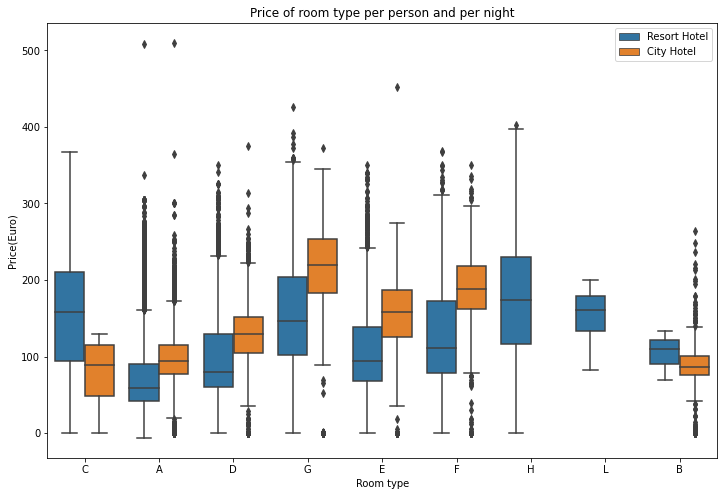

In [414]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'reserved_room_type' , y = "adr" , hue = "hotel" , data = data2)
plt.title("Price of room type per person and per night")
plt.xlabel("Room type")
plt.ylabel("Price(Euro)")
plt.legend()
plt.show()

In [415]:
data_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0 )]
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0 )]
data_resort.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [416]:
data_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [417]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [418]:
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [419]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [420]:
final = resort_hotel.merge(city_hotel , on = "arrival_date_month")
final.columns  = ["month" , "Price_for_resort" , "Price_for_city"]
final

,month,Price_for_resort,Price_for_city
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [421]:
!pip install sorted-months-weekdays
!pip install sort-dataframeby-monthorweek

You should consider upgrading via the 'c:\users\ameen\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\ameen\anaconda3\python.exe -m pip install --upgrade pip' command.


In [422]:
import sort_dataframeby_monthorweek as sd
def sort_data(df , colname):
    return sd.Sort_Dataframeby_Month(df,colname)


In [423]:
final = sort_data(final , 'month')
final

,month,Price_for_resort,Price_for_city
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [424]:
final.columns

Index(['month', 'Price_for_resort', 'Price_for_city'], dtype='object')

In [425]:
px.line(final , x = "month" , y = ["Price_for_resort" , "Price_for_city"] , title = "Room Price per night over the month")

In [426]:
data_resort.head()
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns = ['month' , 'no. of guests']
rush_resort

,month,no. of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [427]:
data_city.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0.0,0,Transient,0.00,0,0,Check-Out,7/3/2015
40066,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,58.67,0,0,Check-Out,7/5/2015
40070,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015
40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0.0,0,Transient-Party,43.00,0,0,Check-Out,7/5/2015
40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0.0,0,Transient-Party,86.00,0,0,Check-Out,7/5/2015


In [428]:
rush_city = data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns = ['month' , 'no. of guests']
rush_city

,month,no. of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [429]:
final_rush = rush_resort.merge(rush_city , on = 'month')

In [430]:
final_rush

,month,no. of guests_x,no. of guests_y
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [431]:
final_rush.columns = ["Month" , "No. of Guests in Resort Hotel" , "No. of Guests in City Hotel"]
final_rush

,Month,No. of Guests in Resort Hotel,No. of Guests in City Hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [432]:
final_rush = sort_data(final_rush , 'Month')
final_rush

,Month,No. of Guests in Resort Hotel,No. of Guests in City Hotel
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [433]:
final_rush.columns


Index(['Month', 'No. of Guests in Resort Hotel',
       'No. of Guests in City Hotel'],
      dtype='object')

In [434]:
px.line(final_rush , x = 'Month' , y = [ 'No. of Guests in Resort Hotel',
       'No. of Guests in City Hotel'] , title = "Total No. of Guests month")

In [435]:
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [436]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.292876,0.016622,0.008315,-0.005948,-0.001323,0.025542,0.058182,0.004851,-0.032569,-0.083745,0.110139,-0.057365,-0.144832,-0.046770,-0.083594,0.054301,0.046492,-0.195701,-0.234877
lead_time,0.292876,1.000000,0.040334,0.127046,0.002306,0.085985,0.166892,0.117575,-0.037878,-0.021003,-0.123209,0.086025,-0.073599,0.002230,-0.013114,-0.085854,0.170008,-0.065018,-0.116624,-0.095949
arrival_date_year,0.016622,0.040334,1.000000,-0.540373,-0.000121,0.021694,0.031203,0.030266,0.054710,-0.013192,0.010281,-0.119905,0.029234,0.031416,0.056438,0.033682,-0.056348,0.198429,-0.013812,0.108610
arrival_date_week_number,0.008315,0.127046,-0.540373,1.000000,0.066572,0.018629,0.016047,0.026567,0.005556,0.010417,-0.031125,0.035493,-0.021009,0.006311,-0.018225,-0.032912,0.022677,0.076281,0.001980,0.026202
arrival_date_day_of_month,-0.005948,0.002306,-0.000121,0.066572,1.000000,-0.016225,-0.028362,-0.001754,0.014550,-0.000235,-0.006471,-0.027027,-0.000306,0.011266,0.000159,0.003667,0.022532,0.030291,0.008569,0.003026
stays_in_weekend_nights,-0.001323,0.085985,0.021694,0.018629,-0.016225,1.000000,0.494175,0.094759,0.046135,0.018607,-0.086009,-0.012769,-0.042859,0.050191,0.162411,-0.080783,-0.054399,0.050670,-0.018520,0.073124
stays_in_week_nights,0.025542,0.166892,0.031203,0.016047,-0.028362,0.494175,1.000000,0.096214,0.044652,0.020373,-0.095302,-0.013976,-0.048873,0.080018,0.196777,-0.044437,-0.002026,0.066847,-0.024933,0.068738
adults,0.058182,0.117575,0.030266,0.026567,-0.001754,0.094759,0.096214,1.000000,0.029409,0.017890,-0.140973,-0.007070,-0.108856,-0.041472,0.023370,-0.166182,-0.008365,0.224253,0.014438,0.123353
children,0.004851,-0.037878,0.054710,0.005556,0.014550,0.046135,0.044652,0.029409,1.000000,0.023999,-0.032475,-0.024755,-0.021078,0.051000,0.050461,-0.042554,-0.033293,0.325057,0.056247,0.081747
babies,-0.032569,-0.021003,-0.013192,0.010417,-0.000235,0.018607,0.020373,0.017890,0.023999,1.000000,-0.008813,-0.007509,-0.006552,0.085605,0.030235,-0.009426,-0.010627,0.029043,0.037389,0.097939


In [437]:
co_relation = data.corr()['is_canceled']
co_relation

is_canceled                       1.000000
lead_time                         0.292876
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month        -0.005948
stays_in_weekend_nights          -0.001323
stays_in_week_nights              0.025542
adults                            0.058182
children                          0.004851
babies                           -0.032569
is_repeated_guest                -0.083745
previous_cancellations            0.110139
previous_bookings_not_canceled   -0.057365
booking_changes                  -0.144832
agent                            -0.046770
company                          -0.083594
days_in_waiting_list              0.054301
adr                               0.046492
required_car_parking_spaces      -0.195701
total_of_special_requests        -0.234877
Name: is_canceled, dtype: float64

In [438]:
co_relation.abs().sort_values(ascending = False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
company                           0.083594
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [439]:
data.groupby("is_canceled")['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

In [440]:
list_not = ['days_in_waiting_list',"arrival_date_year"]
num_features = [col for col in data.columns if data[col].dtypes != 'O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [441]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [442]:
cat_not = ["arrival_date_year" , "reserved_room_type" , "assigned_room_type" , "country" , "booking_changes","days_in_waiting_list"]
cat_not

['arrival_date_year',
 'reserved_room_type',
 'assigned_room_type',
 'country',
 'booking_changes',
 'days_in_waiting_list']

In [443]:
cat_features = [col for col in data.columns if data[col].dtype == 'O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [444]:
data_cat = data[cat_features]
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,Check-Out,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,Check-Out,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,Check-Out,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,No Deposit,Transient,Check-Out,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,No Deposit,Transient,Check-Out,7/3/2015


In [445]:
data_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
deposit_type               object
customer_type              object
reservation_status         object
reservation_status_date    object
dtype: object

In [446]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [447]:
data_cat['reservation_status_date'] = pd.to_datetime(data_cat['reservation_status_date'])

In [448]:
data_cat['year'] = data_cat['reservation_status_date'].dt.year
data_cat['day'] = data_cat['reservation_status_date'].dt.day
data_cat['month'] = data_cat['reservation_status_date'].dt.month

In [449]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,reservation_status_date,year,day,month
0,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,Check-Out,2015-07-01,2015,1,7
1,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,Check-Out,2015-07-01,2015,1,7
2,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,Check-Out,2015-07-02,2015,2,7
3,Resort Hotel,July,BB,Corporate,Corporate,No Deposit,Transient,Check-Out,2015-07-02,2015,2,7
4,Resort Hotel,July,BB,Online TA,TA/TO,No Deposit,Transient,Check-Out,2015-07-03,2015,3,7


In [450]:
data_cat.drop("reservation_status_date" , axis = 1 , inplace = True)
data_cat['cancellation'] = data['is_canceled']
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,year,day,month,cancellation
0,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,Check-Out,2015,1,7,0
1,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,Check-Out,2015,1,7,0
2,Resort Hotel,July,BB,Direct,Direct,No Deposit,Transient,Check-Out,2015,2,7,0
3,Resort Hotel,July,BB,Corporate,Corporate,No Deposit,Transient,Check-Out,2015,2,7,0
4,Resort Hotel,July,BB,Online TA,TA/TO,No Deposit,Transient,Check-Out,2015,3,7,0


In [451]:
cols = data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status'],
      dtype='object')

In [452]:
data_cat.groupby(["hotel"])['cancellation'].mean()

hotel
City Hotel      0.417859
Resort Hotel    0.277674
Name: cancellation, dtype: float64

For all the columns we will do:

In [453]:
for col in cols:
    dict  = (data_cat.groupby([col])["cancellation"].mean().to_dict())
    data_cat[col] = data_cat[col].map(dict)

In [454]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,year,day,month,cancellation
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,1,7,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,1,7,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,2,7,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.28402,0.407864,0,2015,2,7,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.28402,0.407864,0,2015,3,7,0


In [455]:
dataframe = pd.concat([data_cat , data[num_features]] , axis =1)

In [456]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,year,day,month,cancellation,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,1,7,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,1,7,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,2,7,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.28402,0.407864,0,2015,2,7,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.28402,0.407864,0,2015,3,7,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [457]:
dataframe.drop('cancellation' , axis = 1 , inplace = True)
dataframe

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,year,day,month,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,1,7,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.00,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,1,7,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.00,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,2,7,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.00,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.28402,0.407864,0,2015,2,7,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.00,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.28402,0.407864,0,2015,3,7,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.343313,0.410598,0.28402,0.407864,0,2017,6,9,0,23,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0.0,96.14,0,0
119386,0.417859,0.377823,0.374106,0.367590,0.410598,0.28402,0.407864,0,2017,7,9,0,102,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0.0,225.43,0,2
119387,0.417859,0.377823,0.374106,0.367590,0.410598,0.28402,0.407864,0,2017,7,9,0,34,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0.0,157.71,0,4
119388,0.417859,0.377823,0.374106,0.367590,0.410598,0.28402,0.407864,0,2017,7,9,0,109,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0.0,104.40,0,0


In [458]:
dataframe.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,deposit_type,customer_type,reservation_status,year,day,month,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,1,7,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,1,7,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.28402,0.407864,0,2015,2,7,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.28402,0.407864,0,2015,2,7,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.28402,0.407864,0,2015,3,7,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,98.0,0,1


In [485]:
dataframe.shape


(119209, 29)

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

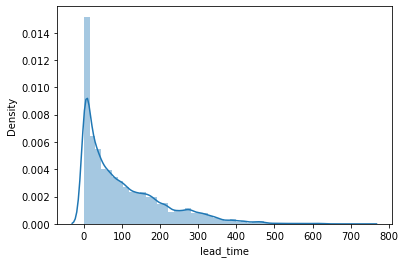

In [459]:
sns.distplot(dataframe['lead_time'])

In [460]:
dataframe.shape

(119210, 29)

In [461]:
import numpy as np
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

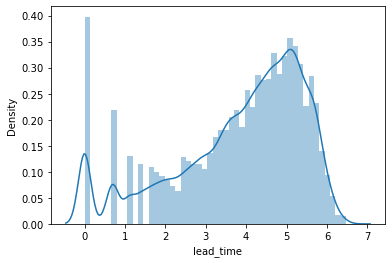

In [462]:
handle_outlier('lead_time')
sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

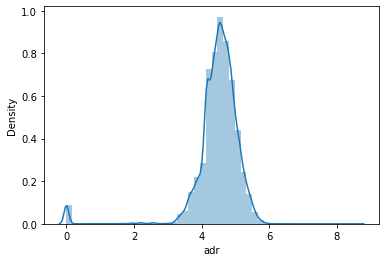

In [463]:
handle_outlier('adr')
sns.distplot(dataframe['adr'].dropna())

In [464]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
deposit_type                      0
customer_type                     0
reservation_status                0
year                              0
day                               0
month                             0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
company                           0
adr                               1
required_car_parking_spaces 

In [465]:
dataframe.dropna(inplace = True)
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status', 'year', 'day', 'month', 'is_canceled',
       'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [486]:
y = dataframe['is_canceled']
x = dataframe.drop('is_canceled' , axis = 1)

In [487]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [510]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.095 , random_state = 0))

In [511]:
feature_sel_model.fit(x, y)

SelectFromModel(estimator=Lasso(alpha=0.095, random_state=0))

In [512]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False])

In [515]:
cols = x.columns
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type',
       'reservation_status', 'year', 'day', 'month', 'lead_time',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [516]:
selected_feature = ['year', 'day', 'month','lead_time','deposit_type','arrival_date_week_number','adults', 'children','previous_cancellations','booking_changes', 'company',
       'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

In [519]:
x = x[selected_feature]

In [524]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.25  , random_state = 0)

In [527]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train , y_train)

LogisticRegression()

In [531]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [536]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)

array([[15929,  2710],
       [ 5694,  5470]], dtype=int64)

In [540]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7180149649364158

In [542]:
from sklearn.model_selection import cross_val_score

In [546]:
score = cross_val_score(logreg , x , y , cv =10)
score.mean()

0.6951574965840553

In [550]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [567]:
models = []
models.append(("LogisticRegression" , LogisticRegression()))
models.append(("Naive Bayas" , GaussianNB()))
models.append(("RandomForest" , RandomForestClassifier()))
models.append(("DecisionTree" , DecisionTreeClassifier()))
models.append(("KNN" , KNeighborsClassifier()))

In [568]:
for name, model in models:
    print(name)
    model.fit(X_train,y_train)
    prediction  = model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(prediction , y_test))
    print('\n')
    print(accuracy_score(prediction , y_test))
    print('\n')

LogisticRegression
[[15929  5694]
 [ 2710  5470]]


0.7180149649364158


Naive Bayas
[[ 8547  1253]
 [10092  9911]]


0.6193336241317988


RandomForest
[[18512  1265]
 [  127  9899]]


0.9532932926215482


DecisionTree
[[17809   819]
 [  830 10345]]


0.9446699996644633


KNN
[[18484  1440]
 [  155  9724]]


0.9464818977955239


